# Bayesian Likelihood How to Notebook
This notebook will hopefully guide you how to use the programs in bayesian likelihood. At some point I will make this a moduel, but that's a future Cody problem. 

In [1]:
import pickle
stars = pickle.load(open("/home/cody/Binary Search/all_average_rv_example.pck", "rb" ) )

"stars" is an astropy table object that has the simplified table that was made at the end of the DataSimp notebook. 

We can find the natural log likelihood for a set of model paramiters given the data in stars.

#### 1. Add Jitter
Jitter is a catch all noise term added to the observational noise. We have two parameters that try and account for this. We assume a strate line in log space as a function of surface gravity LOGG. The two parameters are the slope (b) and y intersept (a). For this notebook we just picked a = 0.3, and b = 0.6, but these can be values that you let varry

In [2]:
%run error_with_jitter.py
err_j = error_with_jitter(stars["RADIAL_ERR"],
                         a = 0.3,
                         b = 0.6,
                         logg = stars["LOGG"])

#### 2. Detection Rate
Next we find the detection rate of the data using a chi2, P-value.

In [3]:
%run binary_fraction.py
detection_rate_data = binary_fraction(stars['RADIALV'], err_j)
print(detection_rate_data)

0.41968911917098445


#### 3. ln(likelihood)
For this set of stars about 42% of the observed stars have large enough deviations from their mean value to confidently say they are not solo stars (i.e. binaries). 
Now we need to make synthetic galaxies to then compare the model to the data to then find the likelihood. 

It's important that the same jitter paramiters are used for the detection rate as well as the lnlikelihood

Side note: The inputs to lnlikelihood are coded as possitional arguments, I'm making them keyword arguments for now so you know what they are

In [4]:
%run lnlikelihood.py
import astropy.units as u

In [5]:
LNL = lnlikelihood(detection_rate_data,
                  num_of_galaxies = 50,
                  cloud = stars,
                  bf = 0.8,
                  m_min = 100*u.jupiterMass,
                  mu = 2.5,
                  sigma = 2., 
                  a = 0.3,
                  b = 0.6)

In [6]:
LNL

-5.00080811001625

Not a lot is learned from looking at one likelihood for one model. We want to look at a range of model's and see what fits the best. Here's a simple loop that will check different binary fractions and return all of the log likelihoods for the different fractions

In [7]:
a = 0.3
b = 0.6
mu = 2.5
sigma = 2
fractions = np.linspace(0, 1, 10)
err_j = error_with_jitter(stars['RADIAL_ERR'], a, b, stars['LOGG'])

detection_rate = binary_fraction(stars['RADIALV'], err_j)
lnl = []
for n in range(len(fractions)):
    lnl.append(lnlikelihood(detection_rate,
                            50,
                            stars,
                            fractions[n],
                            100 * u.jupiterMass,
                            mu,
                            sigma,
                            a,
                            b)
               )
    print("Done with,", n) # I like to add print statments so I know how much longer I need to wait. 

Done with, 0
Done with, 1
Done with, 2
Done with, 3
Done with, 4
Done with, 5
Done with, 6
Done with, 7
Done with, 8
Done with, 9


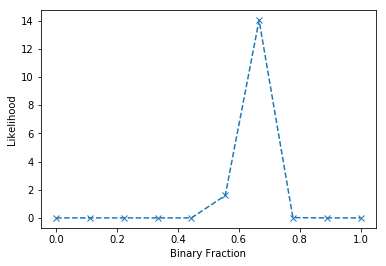

In [10]:
import matplotlib.pyplot as plt
plt.plot(fractions, np.exp(lnl), 'x--')
plt.ylabel("Likelihood")
plt.xlabel("Binary Fraction")
plt.show()